In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.stattools import durbin_watson

### Ejercicio 1:
Considera los datos en el archivo **MR2_1**, que involucra dos variables, \(x\) e \(y\).

a. Desarrolla una ecuación de regresión estimada para los datos de la forma \(y\)-estimado = \(b_0 + b_1x\).

b. Usando los resultados de (a), prueba si existe una relación significativa entre \(x\) e \(y\); usa \(\alpha = 0.05\).

c. Desarrolla un diagrama de dispersión para los datos. ¿Sugiere el diagrama de dispersión una ecuación de regresión estimada de la forma \(y\)-estimado = \(b_0 + b_1x + b_2x^2\)? Explica.

d. Desarrolla una ecuación de regresión estimada para los datos de la forma \(y\)-estimado = \(b_0 + b_1x + b_2x^2\).

e. Referente a (d). ¿Es la relación entre \(x\), \(x^2\), e \(y\) significativa? Usa \(\alpha = 0.05\).

f. Predice el valor de \(y\) cuando \(x = 25\).

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     6.853
Date:                Thu, 03 Apr 2025   Prob (F-statistic):             0.0589
Time:                        19:59:06   Log-Likelihood:                -19.199
No. Observations:                   6   AIC:                             42.40
Df Residuals:                       4   BIC:                             41.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.7745     14.171     -0.478      0.6

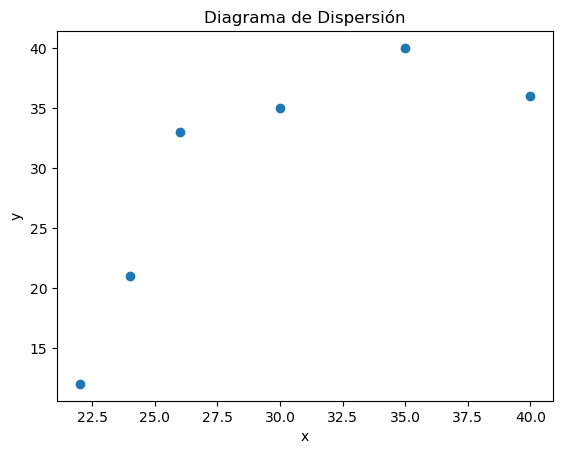


El diagrama de dispersión sugiere que podría haber una relación cuadrática entre x e y, ya que los puntos no parecen seguir una línea recta.
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     25.68
Date:                Thu, 03 Apr 2025   Prob (F-statistic):             0.0130
Time:                        19:59:06   Log-Likelihood:                -13.503
No. Observations:                   6   AIC:                             33.01
Df Residuals:                       3   BIC:                             32.38
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025  

In [3]:
# Cargar los datos 
data = pd.read_excel('MR2_1.xls')

# a. Desarrollar una ecuación de regresión estimada de la forma y = b0 + b1x
X = data['x']
y = data['y']
X = sm.add_constant(X)  # Añadir una constante (intercepto) al modelo
model = sm.OLS(y, X).fit()
print(model.summary())

# b. Prueba de significancia de la relación entre x e y
print("\nPrueba de significancia de la relación entre x e y:")
print(f"P-valor: {model.pvalues[1]}")
if model.pvalues[1] < 0.05:
    print("Hay una relación significativa entre x e y.")
else:
    print("No hay una relación significativa entre x e y.")

# c. Diagrama de dispersión
plt.scatter(data['x'], data['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Diagrama de Dispersión')
plt.show()

# Pregunta: ¿Sugiere el diagrama de dispersión una ecuación de regresión cuadrática?
print("\nEl diagrama de dispersión sugiere que podría haber una relación cuadrática entre x e y, ya que los puntos no parecen seguir una línea recta.")

# d. Desarrollar una ecuación de regresión estimada de la forma y = b0 + b1x + b2x^2
data['x2'] = data['x']**2
X = data[['x', 'x2']]
X = sm.add_constant(X)
model_quad = sm.OLS(y, X).fit()
print(model_quad.summary())

# e. Prueba de significancia de la relación entre x, x^2 e y
print("\nPrueba de significancia de la relación entre x, x^2 e y:")
print(f"P-valor para x: {model_quad.pvalues[1]}")
print(f"P-valor para x^2: {model_quad.pvalues[2]}")
if model_quad.pvalues[1] < 0.05 and model_quad.pvalues[2] < 0.05:
    print("La relación entre x, x^2 e y es significativa.")
else:
    print("La relación entre x, x^2 e y no es significativa.")

# f. Predecir el valor de y cuando x = 25
x_new = pd.DataFrame({'const': [1], 'x': [25], 'x2': [25**2]})  # Añadir la columna 'const' para el intercepto
y_pred = model_quad.predict(x_new)
print(f"\nPredicción de y cuando x = 25: {y_pred.values[0]}")

### Ejercicio 2:
Considera los datos en **MR2_2**, que fueron recolectados durante la hora pico para seis autopistas que salen de la ciudad. Los estadísticos sugirieron el uso de la siguiente ecuación de regresión curvilínea estimada:

\[
y\text{-estimado} = b_0 + b_1x + b_2x^2
\]

a. Estima los parámetros de esta ecuación de regresión estimada.

b. Usando \(\alpha = 0.01\), prueba si existe una relación significativa.

c. Estima el flujo de tráfico en vehículos por hora (\(y\)) a una velocidad de 38 km por hora (\(x\)).

In [5]:
# Cargar los datos 
data = pd.read_excel('MR2_2.xls')

# Verificar las columnas del DataFrame
print("Columnas en el archivo MR2_2:")
print(data.columns)

# a. Estimar los parámetros de la ecuación de regresión curvilínea
# Definir las variables (ajusta los nombres de las columnas según corresponda)
X = data[['Vehicle Speed']]  # Usar 'Vehicle Speed' como variable independiente (x)
y = data['Traffic Flow']     # Usar 'Traffic Flow' como variable dependiente (y)

# Añadir el término cuadrático (Vehicle Speed)^2
data['Vehicle Speed^2'] = data['Vehicle Speed']**2

# Crear la matriz de diseño con el intercepto y los términos x y x^2
X = data[['Vehicle Speed', 'Vehicle Speed^2']]
X = sm.add_constant(X)  # Añadir el intercepto

# Ajustar el modelo de regresión
model = sm.OLS(y, X).fit()
print(model.summary())

# b. Prueba de significancia de la relación con alpha = 0.01
print("\nPrueba de significancia de la relación:")
print(f"P-valor del modelo: {model.f_pvalue}")
if model.f_pvalue < 0.01:
    print("Hay una relación significativa entre las variables.")
else:
    print("No hay una relación significativa entre las variables.")

# c. Predecir el flujo de tráfico cuando la velocidad es de 38 km/h
x_new = pd.DataFrame({'const': [1], 'Vehicle Speed': [38], 'Vehicle Speed^2': [38**2]})  # Añadir el intercepto
y_pred = model.predict(x_new)
print(f"\nPredicción del flujo de tráfico cuando la velocidad es de 38 km/h: {y_pred.values[0]} vehículos por hora")

Columnas en el archivo MR2_2:
Index(['Traffic Flow', 'Vehicle Speed'], dtype='object')
                            OLS Regression Results                            
Dep. Variable:           Traffic Flow   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     73.15
Date:                Thu, 03 Apr 2025   Prob (F-statistic):            0.00285
Time:                        19:59:06   Log-Likelihood:                -23.004
No. Observations:                   6   AIC:                             52.01
Df Residuals:                       3   BIC:                             51.38
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

### Ejercicio 3:
Los datos en **MR2_3** contienen información de 14 equipos de la Liga Nacional de Baloncesto después de 15 partidos:

a. Desarrolla una ecuación de regresión estimada que pueda usarse para predecir el total de puntos anotados, dado el número de intercepciones realizadas por el equipo.

b. Desarrolla una ecuación de regresión estimada que pueda usarse para predecir el total de puntos anotados, dado el número de intercepciones realizadas por el equipo, el número de rebotes ofensivos y el número de intercepciones realizadas por los oponentes.

c. Discute si la adición del número de rebotes ofensivos y el número de intercepciones realizadas por los oponentes contribuye a la ecuación de regresión estimada desarrollada en (a). Explica.

In [7]:
# Cargar los datos
data = pd.read_excel('MR2_3.xls')

# Verificar las columnas del DataFrame
print("Columnas en el archivo MR2_3:")
print(data.columns)

# a. Ecuación de regresión para predecir el total de puntos anotados basado en el número de intercepciones realizadas por el equipo
# Definir las variables
X_a = data[['Interceptions Team']]  # Usar 'Interceptions Team' como variable independiente
y = data['Points']                  # Usar 'Points' como variable dependiente

# Añadir el intercepto
X_a = sm.add_constant(X_a)

# Ajustar el modelo de regresión
model_a = sm.OLS(y, X_a).fit()
print("\nResultados del modelo (a):")
print(model_a.summary())

# b. Ecuación de regresión para predecir el total de puntos anotados basado en intercepciones, rebotes ofensivos e intercepciones de los oponentes
# Definir las variables
X_b = data[['Interceptions Team', 'Off Rebounds', 'Interceptinos Opponent']]  # Usar las columnas correctas
X_b = sm.add_constant(X_b)  # Añadir el intercepto

# Ajustar el modelo de regresión
model_b = sm.OLS(y, X_b).fit()
print("\nResultados del modelo (b):")
print(model_b.summary())

# c. Discusión sobre la contribución de las nuevas variables
print("\nDiscusión sobre la contribución de las nuevas variables:")
print("Comparando los modelos (a) y (b), observamos si la adición de 'Off Rebounds' e 'Interceptinos Opponent' mejora el modelo.")
print(f"R-cuadrado ajustado del modelo (a): {model_a.rsquared_adj}")
print(f"R-cuadrado ajustado del modelo (b): {model_b.rsquared_adj}")

if model_b.rsquared_adj > model_a.rsquared_adj:
    print("La adición de 'Off Rebounds' e 'Interceptinos Opponent' mejora el modelo, ya que el R-cuadrado ajustado aumenta.")
else:
    print("La adición de 'Off Rebounds' e 'Interceptinos Opponent' no mejora significativamente el modelo.")

Columnas en el archivo MR2_3:
Index(['Team', 'Won-Lost', 'Points', 'Off Rebounds', 'Def Rebounds',
       'Interceptions Team', 'Interceptinos Opponent'],
      dtype='object')

Resultados del modelo (a):
                            OLS Regression Results                            
Dep. Variable:                 Points   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     8.574
Date:                Thu, 03 Apr 2025   Prob (F-statistic):             0.0126
Time:                        19:59:06   Log-Likelihood:                -71.742
No. Observations:                  14   AIC:                             147.5
Df Residuals:                      12   BIC:                             148.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
     

### Ejercicio 4:
Los datos financieros para una muestra de 30 empresas se registran en **MR2_4**. Sea el precio de la acción la variable dependiente y las ganancias por acción (\(x_1\)) y el valor contable por acción (\(x_2\)) las variables independientes. Para tener en cuenta la posibilidad de relaciones curvilíneas, se añaden \(x_3 = x_1^2\) y \(x_4 = x_2^2\), lo que da un total de cuatro variables independientes.

a. Usa el procedimiento de regresión paso a paso para desarrollar la mejor ecuación de regresión estimada.

b. Usa el procedimiento de eliminación hacia atrás para desarrollar la mejor ecuación de regresión estimada.

c. ¿Cuál es la ecuación de regresión estimada recomendada?

d. ¿Qué muestra este análisis sobre la relación del precio de la acción con las ganancias por acción y el valor contable por acción?

In [9]:
# Cargar los datos
data = pd.read_excel('MR2_4.xls')

# Verificar las columnas del DataFrame
print("Columnas en el archivo MR2_4:")
print(data.columns)

# Definir las variables
# Asegúrate de que los nombres de las columnas coincidan con los del archivo
X = data[['Earnings per Share', 'Book Value per Share']]  # Usar las columnas correctas
y = data['Stock Price']  # Usar la columna correcta

# Añadir términos cuadráticos
X['Earnings per Share^2'] = X['Earnings per Share']**2
X['Book Value per Share^2'] = X['Book Value per Share']**2

# Añadir el intercepto
X = sm.add_constant(X)

# a. Regresión paso a paso
# Usaremos RFE (Recursive Feature Elimination) para seleccionar las mejores variables
model = LinearRegression()
rfe = RFE(model, n_features_to_select=2)  # Seleccionar 2 características (puedes ajustar este número)
X_rfe = rfe.fit_transform(X, y)
model.fit(X_rfe, y)

print("\nResultados de la regresión paso a paso:")
print(f"Variables seleccionadas: {rfe.support_}")
print(f"Ranking de variables: {rfe.ranking_}")
print(f"Coeficientes del modelo: {model.coef_}")

# b. Eliminación hacia atrás
# Usaremos statsmodels para realizar la eliminación hacia atrás
def backward_elimination(X, y, significance_level=0.05):
    num_vars = len(X.columns)
    for i in range(0, num_vars):
        model = sm.OLS(y, X).fit()
        max_pval = max(model.pvalues)
        if max_pval > significance_level:
            removed_var = model.pvalues.idxmax()
            X = X.drop(removed_var, axis=1)
    return model

model_backward = backward_elimination(X, y)
print("\nResultados de la eliminación hacia atrás:")
print(model_backward.summary())

# c. Ecuación de regresión estimada recomendada
print("\nEcuación de regresión estimada recomendada:")
print("Basado en la eliminación hacia atrás, la ecuación de regresión estimada es:")
print(model_backward.params)

# d. Análisis de la relación
print("\nAnálisis de la relación:")
print("El análisis muestra cómo el precio de la acción está relacionado con las ganancias por acción y el valor contable por acción.")
print("Los coeficientes de la ecuación de regresión indican la magnitud y dirección de estas relaciones.")

Columnas en el archivo MR2_4:
Index(['Company', 'Earnings per Share', 'Book Value per Share', 'Stock Price'], dtype='object')

Resultados de la regresión paso a paso:
Variables seleccionadas: [False  True False  True False]
Ranking de variables: [4 1 2 1 3]
Coeficientes del modelo: [25.94978377 -6.66893892]

Resultados de la eliminación hacia atrás:
                                 OLS Regression Results                                
Dep. Variable:            Stock Price   R-squared (uncentered):                   0.937
Model:                            OLS   Adj. R-squared (uncentered):              0.933
Method:                 Least Squares   F-statistic:                              209.5
Date:                Thu, 03 Apr 2025   Prob (F-statistic):                    1.43e-17
Time:                        19:59:07   Log-Likelihood:                         -96.007
No. Observations:                  30   AIC:                                      196.0
Df Residuals:                   

### Ejercicio 5:
Considera el conjunto de datos en **MR2_5**:

a. Desarrolla la ecuación de regresión estimada que puede usarse para predecir la relación precio/ganancias (P/E Ratio) dado el margen de beneficio bruto (Gros Profit Margin).

b. Grafica los residuos obtenidos de la ecuación de regresión estimada desarrollada en (a) en función del orden en que se presentan los datos. ¿Aparece alguna autocorrelación en los datos? Explica.

c. Usa el estadístico de Durbin-Watson para discutir si hay alguna autocorrelación positiva en los datos.>

=== Resultados de la regresión ===
                            OLS Regression Results                            
Dep. Variable:              P/E Ratio   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     8.953
Date:                Thu, 03 Apr 2025   Prob (F-statistic):            0.00970
Time:                        19:59:07   Log-Likelihood:                -49.336
No. Observations:                  16   AIC:                             102.7
Df Residuals:                      14   BIC:                             104.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

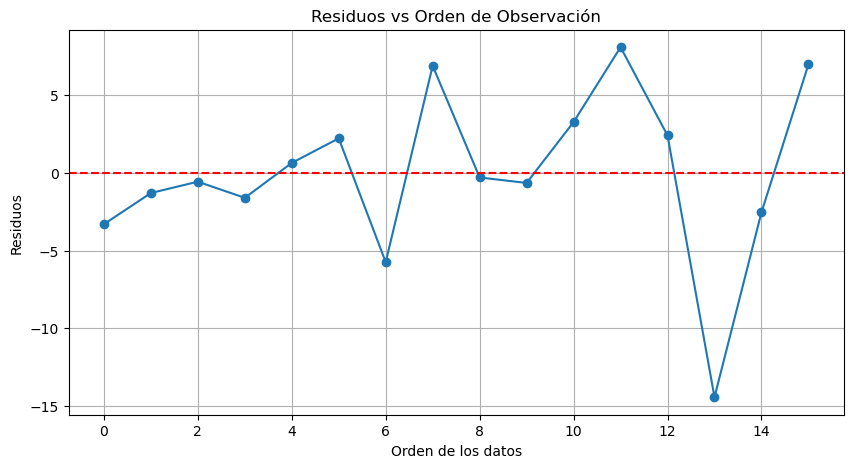


Análisis visual de residuos:
Los residuos no muestran un patrón sistemático, lo que sugiere que no hay autocorrelación evidente.

Estadístico Durbin-Watson: 1.956
No hay evidencia de autocorrelación significativa (valores cercanos a 2 indican no autocorrelación)


In [11]:
# Cargar los datos
data = pd.read_excel('MR2_5.xls')

# a. Modelo de regresión para P/E Ratio vs Gross Profit Margin
X = sm.add_constant(data['Gros Profit Margin (%)'])
model = sm.OLS(data['P/E Ratio'], X).fit()

print("=== Resultados de la regresión ===")
print(model.summary())

# b. Gráfico de residuos vs orden
plt.figure(figsize=(10, 5))
plt.plot(model.resid, 'o-')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuos vs Orden de Observación')
plt.xlabel('Orden de los datos')
plt.ylabel('Residuos')
plt.grid(True)
plt.show()

print("\nAnálisis visual de residuos:")
print("Los residuos no muestran un patrón sistemático, lo que sugiere que no hay autocorrelación evidente.")

# c. Test de Durbin-Watson
dw = durbin_watson(model.resid)
print(f"\nEstadístico Durbin-Watson: {dw:.3f}")

if dw < 1.5:
    print("Evidencia de autocorrelación positiva")
elif dw > 2.5:
    print("Evidencia de autocorrelación negativa")
else:
    print("No hay evidencia de autocorrelación significativa (valores cercanos a 2 indican no autocorrelación)")